# Task 5:Data Science and Analytics

# Perform Eploratory Data Analysis on Indian Premier League

# By -- Rahul Sharma

# GripSep23 The Sparks Foundation

As a sports analyst find out the most successful teams,players and factors contributing win or loss of a game

Suggest teams and players a company should endorse for its products 

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset(matches)
df=pd.read_csv('matches.csv')

In [4]:
#checking for top 5 rows
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
#Now importing the dataset(deliveries)
df1=pd.read_csv('deliveries.csv')
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
#checking winner per season
winner_per_season=df[['id','season','winner']]
winner_per_season

,id,season,winner
0,1,2017,Sunrisers Hyderabad
1,2,2017,Rising Pune Supergiant
2,3,2017,Kolkata Knight Riders
3,4,2017,Kings XI Punjab
4,5,2017,Royal Challengers Bangalore
...,...,...,...
751,11347,2019,Mumbai Indians
752,11412,2019,Mumbai Indians
753,11413,2019,Delhi Capitals
754,11414,2019,Chennai Super Kings


In [8]:
complete_data=df1.merge(winner_per_season,how='inner',left_on='match_id',right_on='id')
complete_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,0,1,NaN,NaN,NaN,11415,2019,Mumbai Indians
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,11415,2019,Mumbai Indians
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,0,1,SR Watson,run out,KH Pandya,11415,2019,Mumbai Indians
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,11415,2019,Mumbai Indians


In [9]:
#checking columns of matches dataset
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [11]:
df.drop('umpire3',axis=1,inplace=True)

In [17]:
Team_wins_per_season=df.groupby('season')['winner'].value_counts()
Team_wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

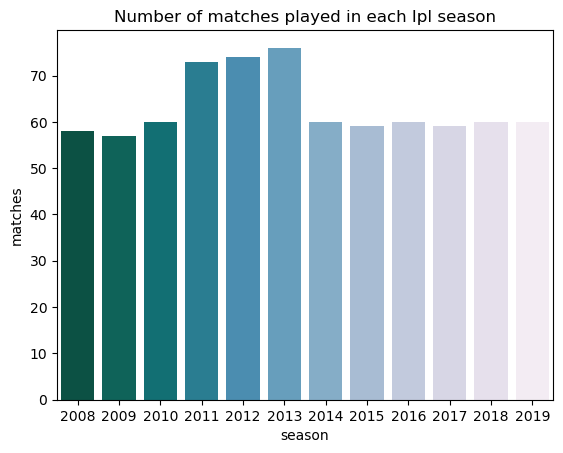

In [18]:
sns.countplot(x='season',data=df,palette='PuBuGn_r')
plt.title('Number of matches played in each Ipl season')
plt.xlabel('season')
plt.ylabel('matches')
plt.show()

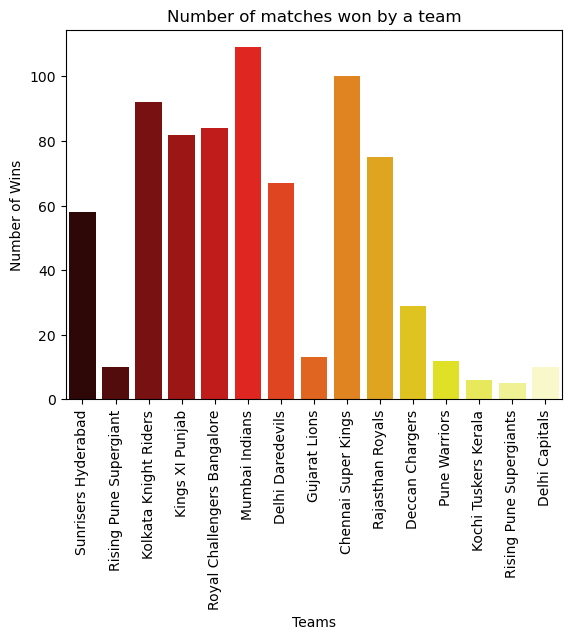

In [20]:
sns.countplot(x='winner',data=df,palette='hot')
plt.title('Number of matches won by a team')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.show()

In [21]:
df['win_by']=np.where(df['win_by_runs']>0,'Bat_First','Field_First')

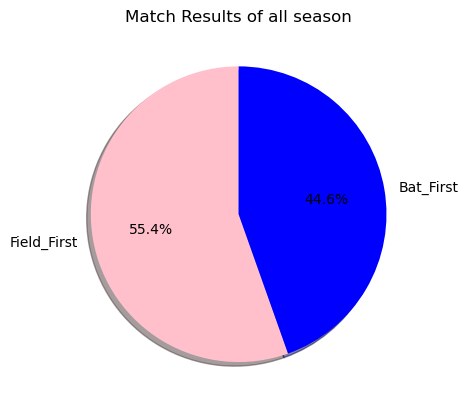

In [22]:
win=df.win_by.value_counts()
labels=np.array(win.index)
sizes=win.values
colors=['pink','blue']
plt.pie(sizes,labels=labels,colors=colors,
       autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Match Results of all season')
plt.show()

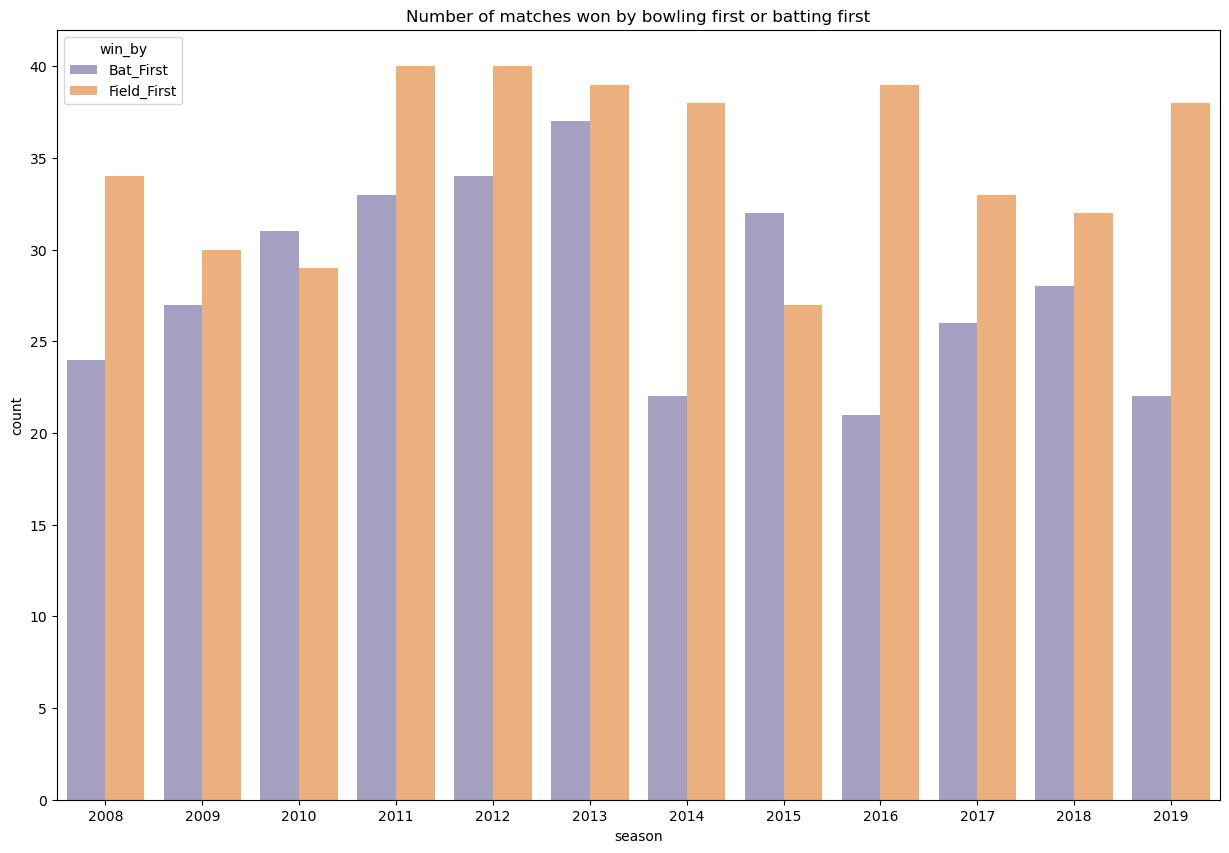

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x='season',hue='win_by',data=df,palette='tab20c_r')
plt.title('Number of matches won by bowling first or batting first')
plt.xlabel('season')
plt.ylabel('count')
plt.show()

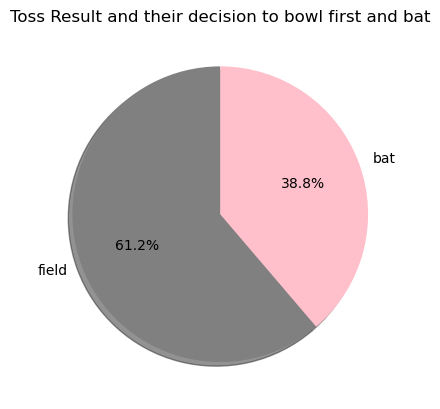

In [24]:
#analysis of toss decision
Toss=df.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes=Toss.values
colors=['gray','pink']
plt.pie(sizes,labels=labels,colors=colors,
       autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Toss Result and their decision to bowl first and bat')
plt.show()

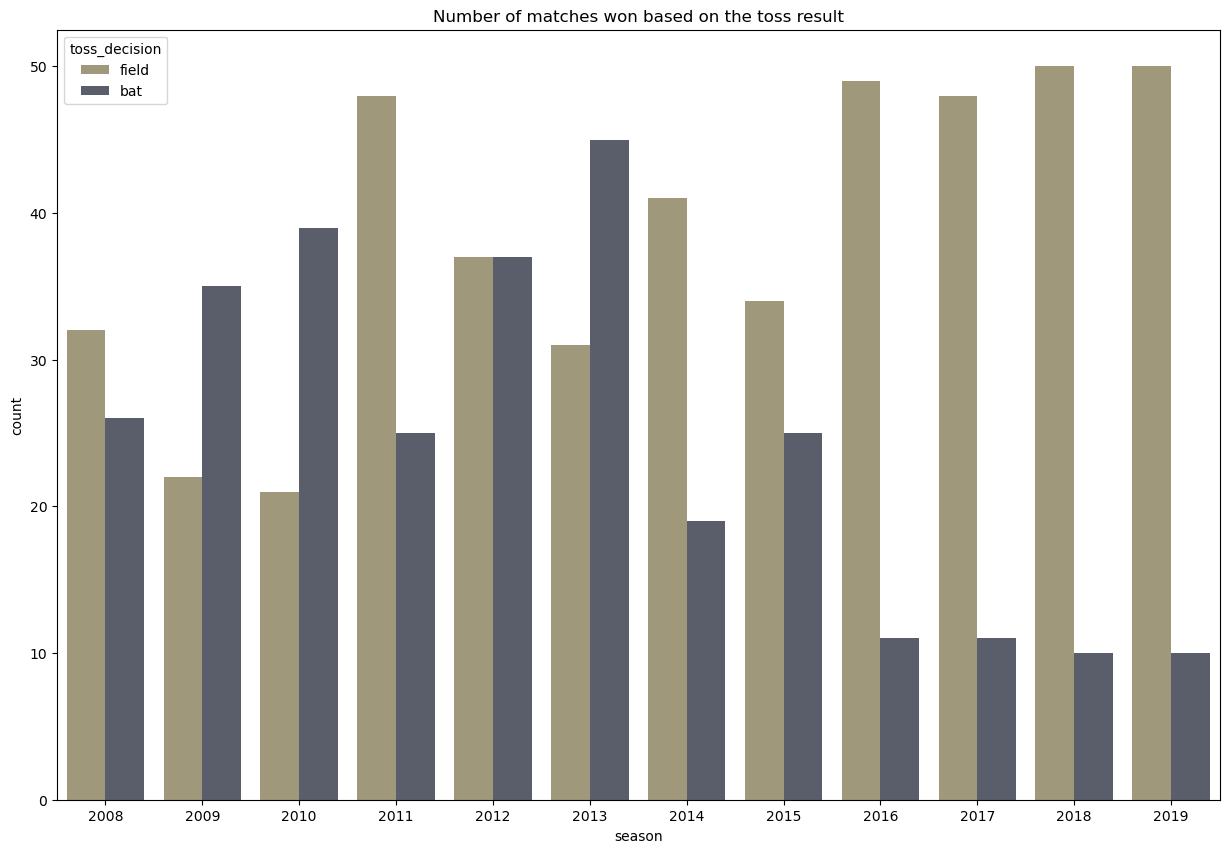

In [25]:
#Matches won based on toss
plt.figure(figsize=(15,10))
sns.countplot(x='season',hue='toss_decision',data=df,palette='cividis_r')
plt.title('Number of matches won based on the toss result')
plt.xlabel('season')
plt.ylabel('count')
plt.show()

In [26]:
#season winner
finals=df.drop_duplicates(subset=['season'],keep='last')
finals[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


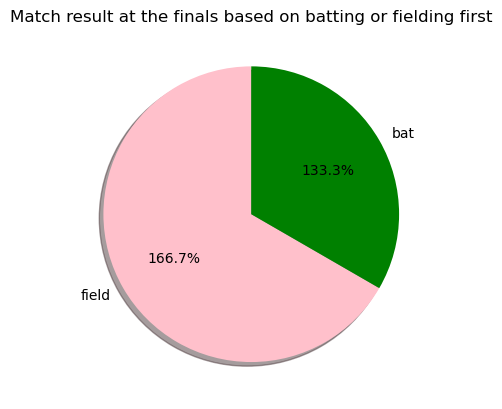

In [27]:
#winning percentage by batting or bowling first
matches=finals.win_by.value_counts()
labels=np.array(Toss.index)
sizes=matches.values
colors=['pink','green']
plt.pie(sizes,labels=labels,colors=colors,
       autopct='1%.1f%%',shadow=True,startangle=90)
plt.title('Match result at the finals based on batting or fielding first')
plt.show()

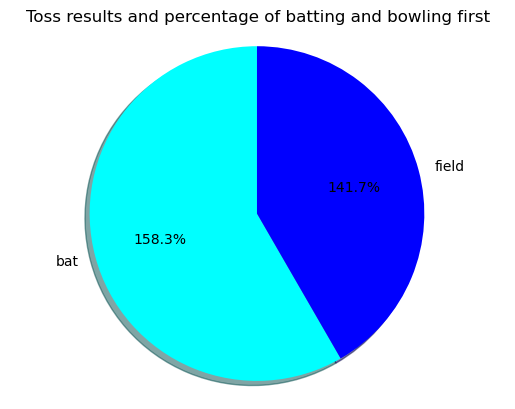

In [29]:
#Toss and decision to bat or bowl first at the finals
Toss=finals.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes=Toss.values
colors=['cyan','blue']
plt.pie(sizes,labels=labels,colors=colors,
       autopct='1%.1f%%',shadow=True,startangle=90)
plt.title('Toss results and percentage of batting and bowling first')
plt.axis('equal')
plt.show()

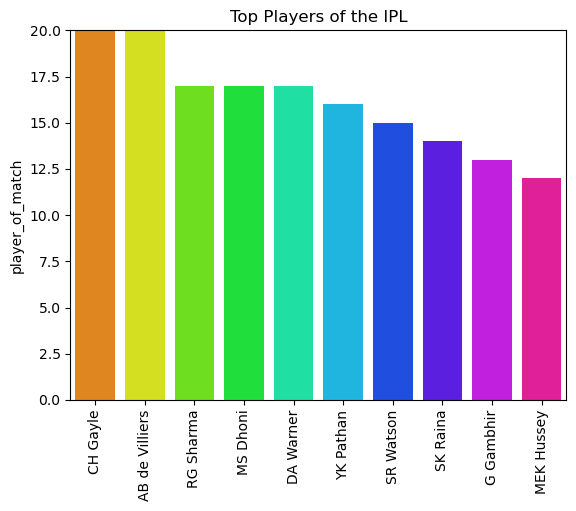

In [32]:
#Top players
top_players=df.player_of_match.value_counts()[:10]
fig,ax=plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel('count')
ax.set_title('Top Players of the IPL')
top_players.plot.bar()
sns.barplot(x=top_players.index,y=top_players,orient='v',palette='hsv');
plt.show()

In [33]:
#IPL finalvenues and winnersalong with the number of wins
finals.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [34]:
#Number of seasons won by teams
finals['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [35]:
#toss winner,toss decision,winner in final matches
finals[['toss_winner','toss_decision','winner']].reset_index(drop=True)


,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [36]:
#Man of the match at finals
finals[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [38]:
#Top 10 leading run scorer in IPL
batsman_score=df1.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True).iloc[:10,:,]
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print('*** Top 10 Leading Run scorers in IPL')
batsman_score.iloc[:10,:]

*** Top 10 Leading Run scorers in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [40]:
wicket_data=df1.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [41]:
#ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:,]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108
